## Data Wrangling

In [1]:
#load libraries
#!pip install --upgrade pip seaborn
#!pip install --upgrade pip pandas-profiling
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns;sns.set()
import numpy as np
import scipy as sp
import scipy.interpolate

In [2]:
#import data
b1 = pd.read_csv('Cell1cycle20.csv')
b1.head()

,Cycle ID,Vol (mV),Cur (mA),Cap (mAh),Realtime,Conversion,Time (sec),Time (min),Time (hour),Sample Number,Date/Time,Conversion.1,Time (sec).1,Time (min).1,Time (hour).1,Cell 1 (C),Cell 1 rate of change (C/sec)
0,1.0,3710.0,1299.6,28.9,44218.49133,0.0,0.0,0.000000,0.000000,1,44218.49133,0,0,0.000000,0.000000,26.2558,0.00000
1,1.0,3711.2,1299.6,30.7,44218.49135,2.0,2.0,0.034800,0.000580,2,44218.49139,5,5,0.083333,0.001389,26.2423,-0.00270
2,1.0,3711.8,1299.6,32.5,44218.49141,5.0,7.0,0.118133,0.001969,3,44218.49145,5,10,0.166667,0.002778,26.2484,0.00122
3,1.0,3713.1,1299.6,34.3,44218.49147,5.0,12.0,0.201467,0.003358,4,44218.49150,5,15,0.250000,0.004167,26.2300,-0.00368
4,1.0,3713.4,1299.6,36.1,44218.49153,5.0,17.0,0.284800,0.004747,5,44218.49156,5,20,0.333333,0.005556,26.2530,0.00460


# Resampling Data

In [3]:
import numpy as np
import scipy as sp
import scipy.interpolate
import matplotlib.pyplot as plt

#data
x1 = b1.iloc[:,6].values
y1 = b1.iloc[:,1].values
y2 = b1.iloc[:,2].values
y3 = b1.iloc[:,3].values
y4 = b1.iloc[:,15].values
y5 = b1.iloc[:,16].values
y6 = b1.iloc[:,10].values

# Interpolate the data using linear interpolation to "new_length" samples
new_length = 35787
new_x = np.linspace(0, 178930, new_length)
new_y1 = sp.interpolate.interp1d(x1, y1, kind='linear')(new_x)
new_y2 = sp.interpolate.interp1d(x1, y2, kind='linear')(new_x)
new_y3 = sp.interpolate.interp1d(x1, y3, kind='linear')(new_x)
#convert float to string for creating timestamps
new_y6 = str(y6)

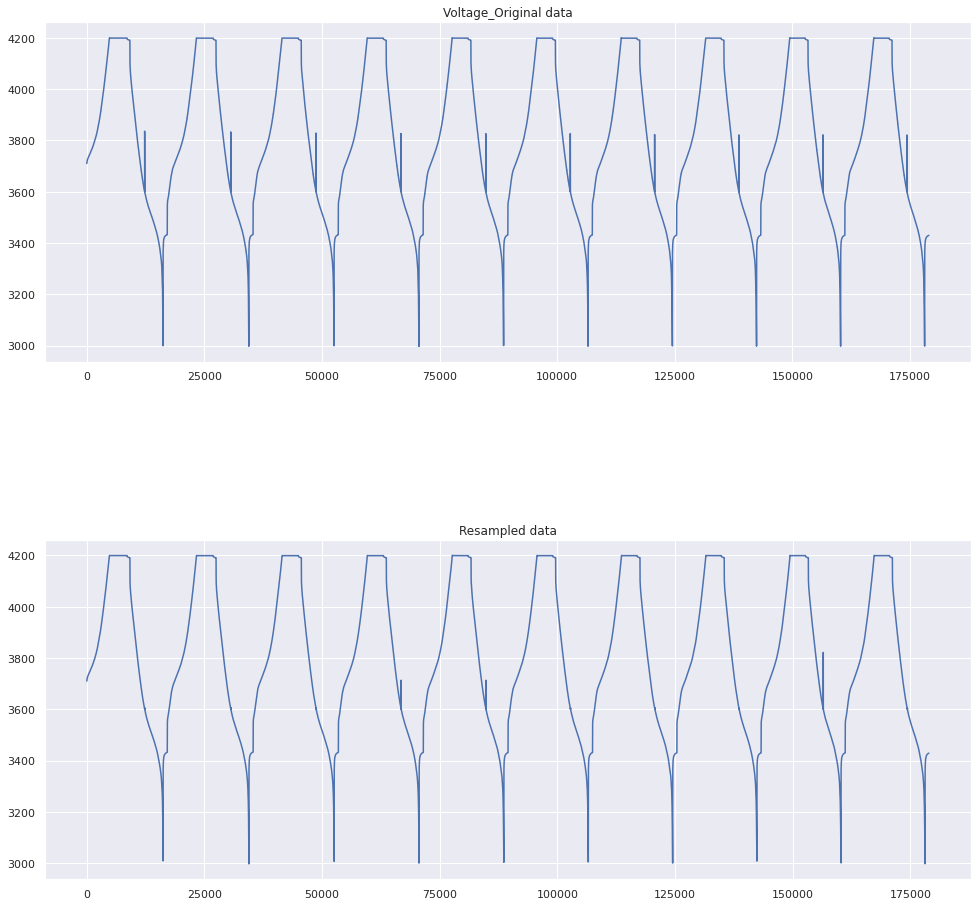

In [4]:
# Plot the results
figure, axes = plt.subplots(nrows=1, ncols=1)
plt.subplot(2,1,1)
plt.plot(x1, y1, '-')
plt.title('Voltage_Original data')

plt.subplot(2,1,2)
plt.plot(new_x, new_y1, '-')
plt.title('Resampled data')
figure. tight_layout(pad=1.0)

figure.set_figheight(15)
figure.set_figwidth(15)
plt.show()

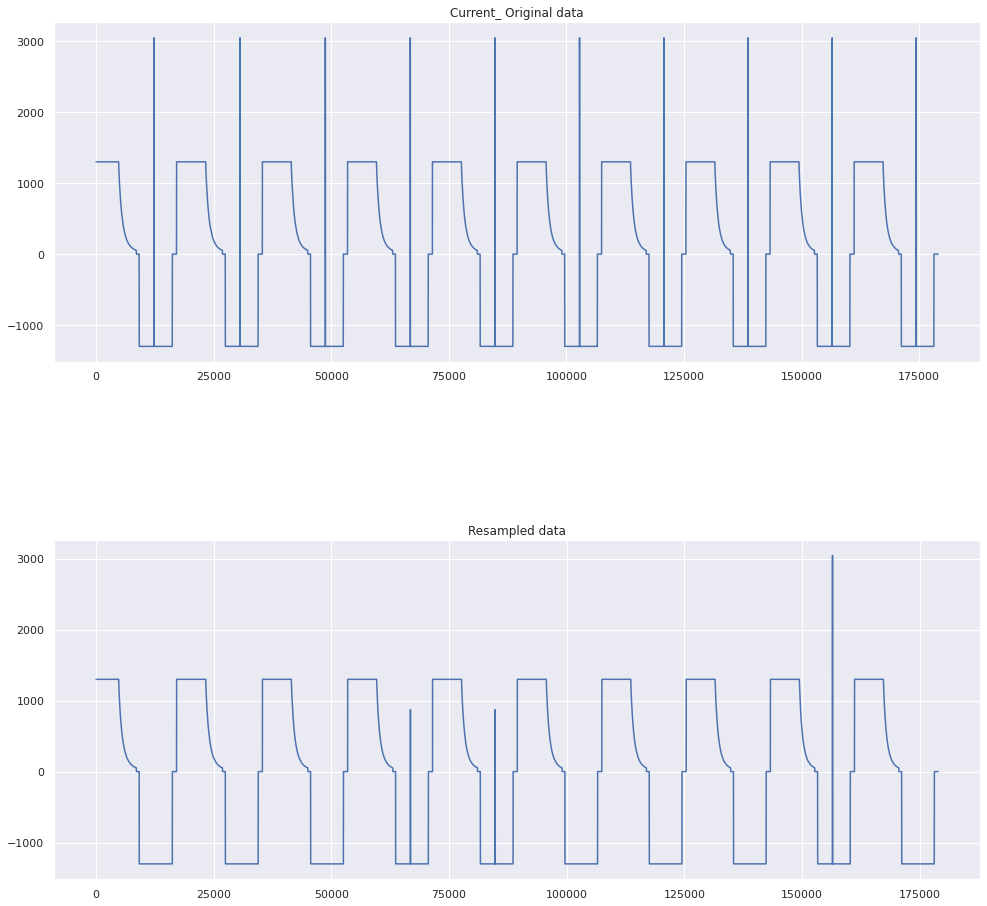

In [5]:
# Plot the results
figure, axes = plt.subplots(nrows=1, ncols=1)

plt.subplot(2,1,1)
plt.plot(x1, y2, '-')
plt.title('Current_ Original data')

plt.subplot(2,1,2)
plt.plot(new_x, new_y2, '-')
plt.title('Resampled data')
figure. tight_layout(pad=1.0)

figure.set_figheight(15)
figure.set_figwidth(15)
plt.show()

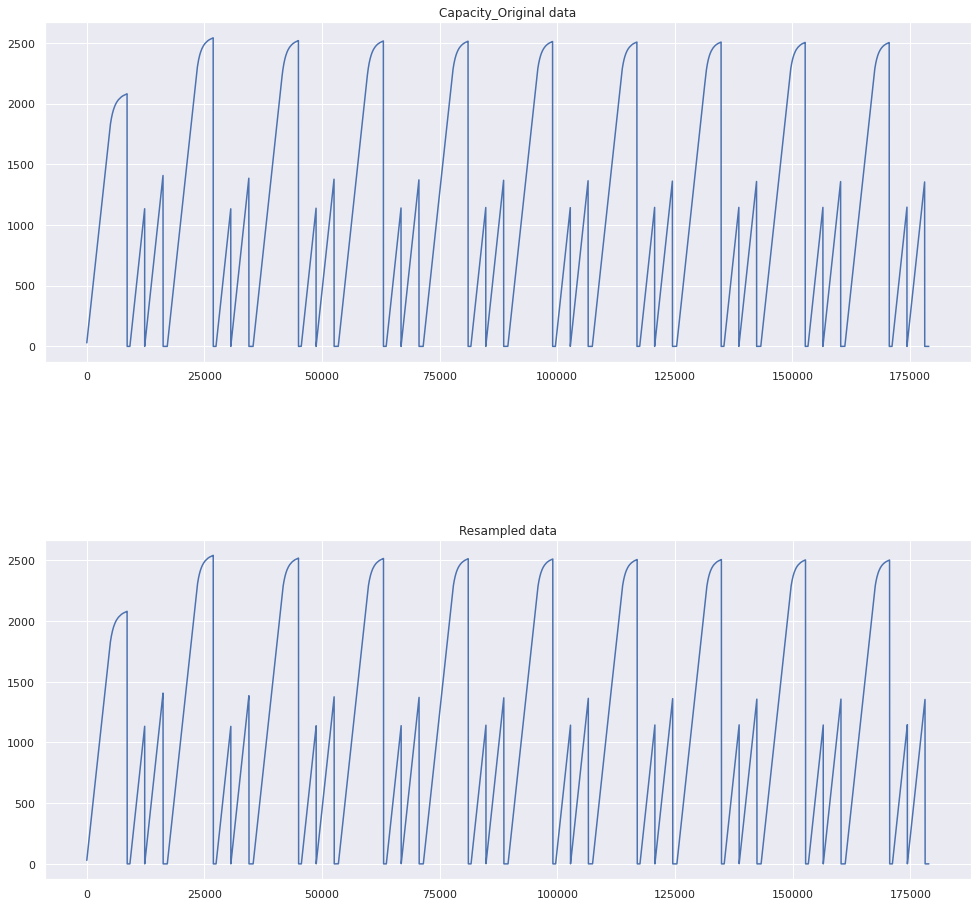

In [6]:
figure, axes = plt.subplots(nrows=1, ncols=1)
plt.subplot(2,1,1)
plt.plot(x1, y3, '-')
plt.title('Capacity_Original data')

plt.subplot(2,1,2)
plt.plot(new_x, new_y3, '-')
plt.title('Resampled data')
figure. tight_layout(pad=1)
figure.set_figheight(15)
figure.set_figwidth(15)
plt.show()


NOTE: Pulse disappears on resampling the data with equal time intervals for some cycles

In [7]:
import pandas as pd

data = {'DateTime': y6,  
        'Time(s)':  new_x,
        'Vol(mV)': new_y1,
        'Current(mA)': new_y2,
        'Capacit(mAh)': new_y3,
        'Temperature(C)': y4,
        'Rate of temp change(C/s)': y5,
        }

df = pd.DataFrame (data, columns = ['DateTime','Time(s)', 'Vol(mV)','Current(mA)','Capacit(mAh)','Rate of temp change(C/s)','Temperature(C)' ])
df.head()

,DateTime,Time(s),Vol(mV),Current(mA),Capacit(mAh),Rate of temp change(C/s),Temperature(C)
0,44218.49133,0.0,3710.00,1299.6,28.90,0.00000,26.2558
1,44218.49139,5.0,3711.56,1299.6,31.78,-0.00270,26.2423
2,44218.49145,10.0,3712.58,1299.6,33.58,0.00122,26.2484
3,44218.49150,15.0,3713.28,1299.6,35.38,-0.00368,26.2300
4,44218.49156,20.0,3714.00,1299.6,37.20,0.00460,26.2530


In [8]:
#convert excel date to normal date
import datetime
def xldate_to_datetime(xldate):
    temp = datetime.datetime(1900, 1, 1)
    delta = datetime.timedelta(days=xldate)
    return temp+delta

df['DateTime'] = df.apply(lambda x: xldate_to_datetime(x['DateTime']), axis=1)
df.head()

,DateTime,Time(s),Vol(mV),Current(mA),Capacit(mAh),Rate of temp change(C/s),Temperature(C)
0,2021-01-24 11:47:30.912,0.0,3710.00,1299.6,28.90,0.00000,26.2558
1,2021-01-24 11:47:36.096,5.0,3711.56,1299.6,31.78,-0.00270,26.2423
2,2021-01-24 11:47:41.280,10.0,3712.58,1299.6,33.58,0.00122,26.2484
3,2021-01-24 11:47:45.600,15.0,3713.28,1299.6,35.38,-0.00368,26.2300
4,2021-01-24 11:47:50.784,20.0,3714.00,1299.6,37.20,0.00460,26.2530


In [9]:
df = df.set_index('DateTime')
del df['Time(s)']
df

,Vol(mV),Current(mA),Capacit(mAh),Rate of temp change(C/s),Temperature(C)
DateTime,,,,,
2021-01-24 11:47:30.912,3710.00,1299.6,28.90,0.00000,26.2558
2021-01-24 11:47:36.096,3711.56,1299.6,31.78,-0.00270,26.2423
2021-01-24 11:47:41.280,3712.58,1299.6,33.58,0.00122,26.2484
2021-01-24 11:47:45.600,3713.28,1299.6,35.38,-0.00368,26.2300
2021-01-24 11:47:50.784,3714.00,1299.6,37.20,0.00460,26.2530
...,...,...,...,...,...
2021-01-26 13:30:40.608,3429.10,0.0,0.00,0.00124,26.5975
2021-01-26 13:30:45.792,3429.10,0.0,0.00,-0.00386,26.5782
2021-01-26 13:30:50.976,3429.10,0.0,0.00,0.00136,26.5850


# Exploratory Analysis

In [10]:
df.describe()

,Vol(mV),Current(mA),Capacit(mAh),Rate of temp change(C/s),Temperature(C)
count,35787.000000,35787.000000,35787.000000,35787.000000,35787.000000
mean,3812.071839,-8.880502,1071.763484,0.000002,27.506955
std,287.368240,1122.786060,834.887298,0.003113,0.771903
min,2997.200000,-1299.600000,0.000000,-0.022660,25.848200
25%,3570.310000,-1299.600000,360.085000,-0.001940,27.029700
50%,3781.342857,71.010000,898.180000,0.000000,27.586100
75%,4116.340000,1299.600000,1796.114286,0.001960,28.109800
max,4200.400000,3045.500000,2541.600000,0.015400,29.863200


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35787 entries, 2021-01-24 11:47:30.912000 to 2021-01-26 13:31:01.344000
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Vol(mV)                   35787 non-null  float64
 1   Current(mA)               35787 non-null  float64
 2   Capacit(mAh)              35787 non-null  float64
 3   Rate of temp change(C/s)  35787 non-null  float64
 4   Temperature(C)            35787 non-null  float64
dtypes: float64(5)
memory usage: 1.6 MB


In [12]:
#correlation matrix
df.corr()

,Vol(mV),Current(mA),Capacit(mAh),Rate of temp change(C/s),Temperature(C)
Vol(mV),1.000000,0.392785,0.628459,-0.032415,-0.439111
Current(mA),0.392785,1.000000,0.325388,-0.044289,0.117783
Capacit(mAh),0.628459,0.325388,1.000000,-0.050182,-0.071776
Rate of temp change(C/s),-0.032415,-0.044289,-0.050182,1.000000,0.009270
Temperature(C),-0.439111,0.117783,-0.071776,0.009270,1.000000


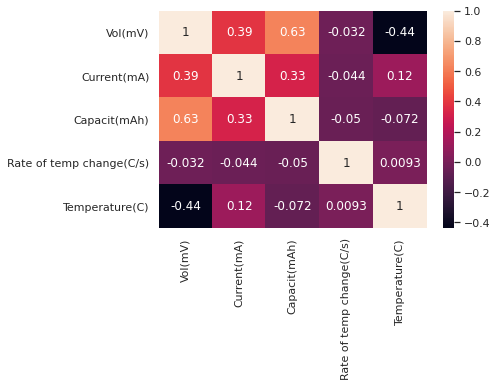

In [13]:
corrMatrix= df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

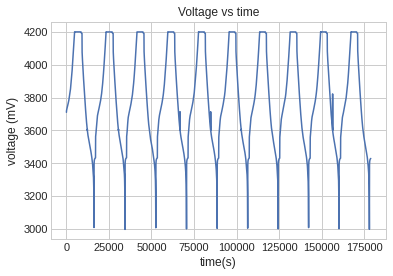

In [14]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
ax.plot(new_x, new_y1);
plt.xlabel('time(s)')
plt.ylabel('voltage (mV)')
plt.title('Voltage vs time')
plt.show()

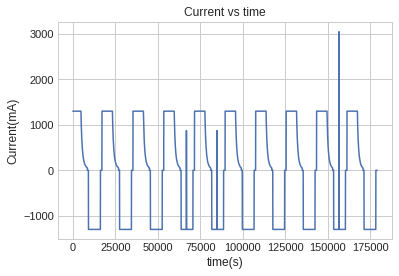

In [15]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
ax.plot(new_x, new_y2);
plt.xlabel('time(s)')
plt.ylabel('Current(mA)')
plt.title('Current vs time')
plt.show()

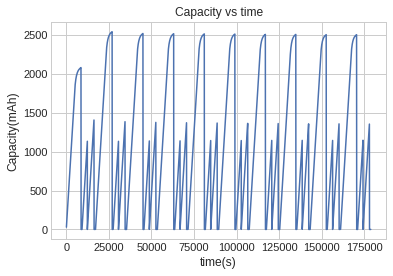

In [16]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
ax.plot(new_x, new_y3);
plt.xlabel('time(s)')
plt.ylabel('Capacity(mAh)')
plt.title('Capacity vs time')
plt.show()

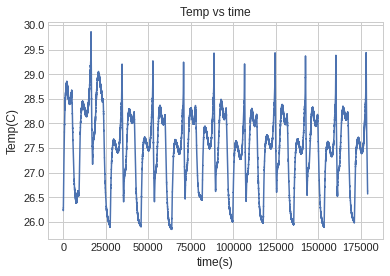

In [17]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
ax.plot(new_x, y4);
plt.xlabel('time(s)')
plt.ylabel('Temp(C)')
plt.title('Temp vs time')
plt.show()

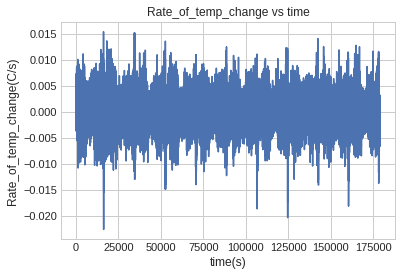

In [18]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
ax.plot(new_x, y5);
plt.xlabel('time(s)')
plt.ylabel('Rate_of_temp_change(C/s)')
plt.title('Rate_of_temp_change vs time')
plt.show()

# LSTM


In [19]:
import numpy as np
from matplotlib import pyplot
from pandas import read_csv
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
!pip install keras
!pip install tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers.recurrent import SimpleRNN
from keras.layers import Input
from keras.models import Model
from sklearn.model_selection import train_test_split  
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau,TensorBoard

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Read data 

In [20]:
# Select features (columns) to be involved intro training and predictions
cols = list(df)[0:5]

# Extract dates (will be used in visualization)
datelist = list(df.index.values)

print('Training set shape == {}'.format(df.shape))
print('All timestamps == {}'.format(len(datelist)))
print('Featured selected: {}'.format(cols))

Training set shape == (35787, 5)
All timestamps == 35787
Featured selected: ['Vol(mV)', 'Current(mA)', 'Capacit(mAh)', 'Rate of temp change(C/s)', 'Temperature(C)']


## Data preprocessing 

Removing all commas and convert data to matrix shape format.



In [21]:
df = df[cols].astype(str)
for i in cols:
    for j in range(0, len(df)):
        df[i][j] = df[i][j].replace(',', '')

df = df.astype(float)

# Using multiple features (predictors)
training_set = df.to_numpy()

print('Shape of training set == {}.'.format(training_set.shape))
training_set

Shape of training set == (35787, 5).


array([[ 3.71000e+03,  1.29960e+03,  2.89000e+01,  0.00000e+00,
         2.62558e+01],
       [ 3.71156e+03,  1.29960e+03,  3.17800e+01, -2.70000e-03,
         2.62423e+01],
       [ 3.71258e+03,  1.29960e+03,  3.35800e+01,  1.22000e-03,
         2.62484e+01],
       ...,
       [ 3.42910e+03,  0.00000e+00,  0.00000e+00,  1.36000e-03,
         2.65850e+01],
       [ 3.42910e+03,  0.00000e+00,  0.00000e+00, -1.56000e-03,
         2.65772e+01],
       [ 3.42910e+03,  0.00000e+00,  0.00000e+00, -1.66000e-03,
         2.65689e+01]])

In [23]:
# training_set[:, 4:5]

Scaling the data

In [24]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() #independant variables
training_set_scaled = sc.fit_transform(training_set)

sc_predict = StandardScaler() #dependant variables
sc_predict.fit_transform(training_set[:, 4:5])

array([[-1.62089408],
       [-1.63838357],
       [-1.63048091],
       ...,
       [-1.19440965],
       [-1.20451469],
       [-1.21526748]])

In [46]:
# Creating a data structure with 90 timestamps and 1 output
X_train = []
y_train = []

# n_future = 1800   # Want to predict 30 mins in the future
# n_past = 6836     # past 2 cycles

# n_future = 900   # Want to predict 15 mins in the future
# n_past = 3418     # past 1 cycles

n_future = 9   # Want to predict 45s in the future
n_past = 150     # past 750 seconds

# n_future = 3418   # Want to predict one cycle
# n_past = 10254     # past 3 cycles

for i in range(n_past, len(training_set_scaled) - n_future +1):
    X_train.append(training_set_scaled[i - n_past:i, 0:df.shape[1] - 1])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 4])

X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (35629, 150, 4).
y_train shape == (35629, 1).


In [47]:
#y_train

## Model creation and training

In [48]:
# Initializing the Neural Network based on LSTM
model = Sequential()

# Adding 1st LSTM layer
model.add(LSTM(units=64, return_sequences=True, input_shape=(n_past, df.shape[1]-1)))

# Adding 2nd LSTM layer
model.add(LSTM(units=10, return_sequences=False))

# Adding Dropout
model.add(Dropout(0.25))

# Output layer
model.add(Dense(units=1, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')

In [49]:
%%time
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

history = model.fit(X_train, y_train, shuffle=False, epochs=30, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=256)

Epoch 1/30
112/112 [==============================] - 28s 219ms/step - loss: 1.0444 - val_loss: 0.2529

Epoch 00001: val_loss improved from inf to 0.25292, saving model to weights.h5
Epoch 2/30
112/112 [==============================] - 23s 208ms/step - loss: 0.9396 - val_loss: 0.3941

Epoch 00002: val_loss did not improve from 0.25292
Epoch 3/30
112/112 [==============================] - 23s 207ms/step - loss: 0.7713 - val_loss: 0.2555

Epoch 00003: val_loss did not improve from 0.25292
Epoch 4/30
112/112 [==============================] - 23s 205ms/step - loss: 0.6138 - val_loss: 0.1335

Epoch 00004: val_loss improved from 0.25292 to 0.13346, saving model to weights.h5
Epoch 5/30
112/112 [==============================] - 23s 201ms/step - loss: 0.6411 - val_loss: 0.4896

Epoch 00005: val_loss did not improve from 0.13346
Epoch 6/30
112/112 [==============================] - 23s 201ms/step - loss: 0.5042 - val_loss: 0.1570

Epoch 00006: val_loss did not improve from 0.13346
Epoch 7/30

## Prediction of future values

In [50]:
# Generate list of sequence of days for predictions
datelist_future = pd.date_range(datelist[-1], periods=n_future, freq='5S').tolist()

'''
Remeber, we have datelist_train from begining.
'''

# Convert Pandas Timestamp to Datetime object (for transformation) --> FUTURE
datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date())

In [51]:
# Perform predictions
predictions_future = model.predict(X_train[-n_future:])

predictions_train = model.predict(X_train[n_past:])

In [53]:
# Inverse the predictions to original measurements

# ---> Special function: convert <datetime.date> to <Timestamp>
def datetime_to_timestamp(x):
    '''
        x : a given datetime value (datetime.date)
    '''
    return datetime.strptime(x.strftime('%Y%m%d'), '%Y%m%d')


y_pred_future = sc_predict.inverse_transform(predictions_future)
y_pred_train = sc_predict.inverse_transform(predictions_train)

PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Temp']).set_index(pd.Series(datelist_future))
PREDICTION_TRAIN = pd.DataFrame(y_pred_train, columns=['Temp']).set_index(pd.Series(datelist[2 * n_past + n_future -1:]))

# # Convert <datetime.date> to <Timestamp> for PREDCITION_TRAIN
# PREDICTION_TRAIN.index = PREDICTION_TRAIN.index.to_series().apply(datetime_to_timestamp)

PREDICTIONS_FUTURE.head()

,Temp
2021-01-26 13:31:01.344,27.481129
2021-01-26 13:31:06.344,27.468716
2021-01-26 13:31:11.344,27.474527
2021-01-26 13:31:16.344,27.497383
2021-01-26 13:31:21.344,27.519823


In [54]:
PREDICTION_TRAIN['Temp'].values

array([27.58202 , 27.59506 , 27.592506, ..., 27.484991, 27.481033,
       27.478148], dtype=float32)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


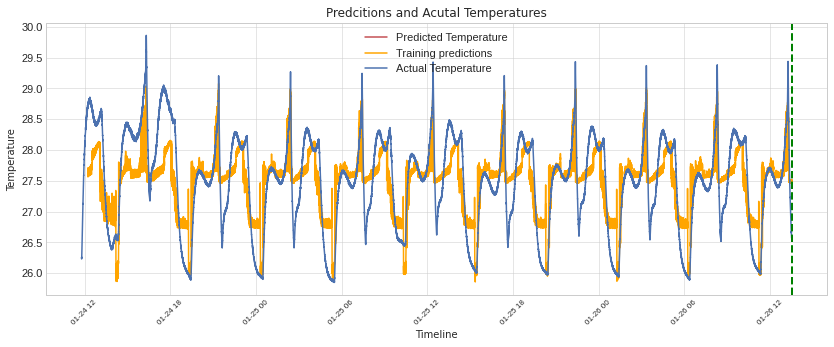

In [55]:
# Set plot size 
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

# Plot parameters
START_DATE_FOR_PLOTTING = '2021-01-24 12:07:25.824'

plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Temp'], color='r', label='Predicted Temperature')
plt.plot(PREDICTION_TRAIN.index, PREDICTION_TRAIN['Temp'], color='orange', label='Training predictions')
plt.plot(df.index, df['Temperature(C)'], color='b', label='Actual Temperature')

plt.axvline(x = min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title('Predcitions and Acutal Temperatures', family='Arial', fontsize=12)
plt.xlabel('Timeline', family='Arial', fontsize=10)
plt.ylabel('Temperature', family='Arial', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

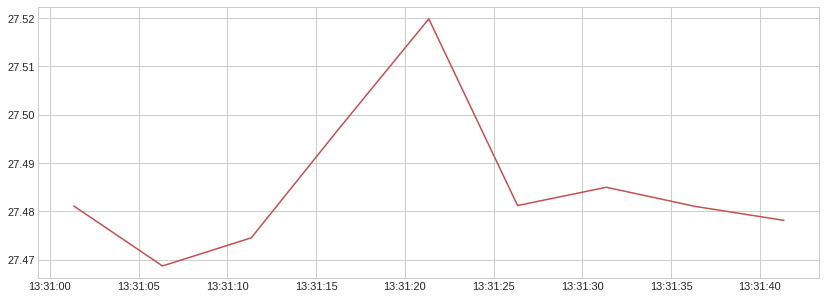

In [56]:
plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Temp'], color='r', label='Predicted Temperature')